In [2]:
import sys 
sys.path.append('../..')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mstats

# Yearly

In [3]:
scale_table = pd.read_excel('../../output/to_send/005/scale_table.xlsx')

In [5]:
scale_table['Year'] = range(1814, 2020)

AREA prev,0.55,0.4602



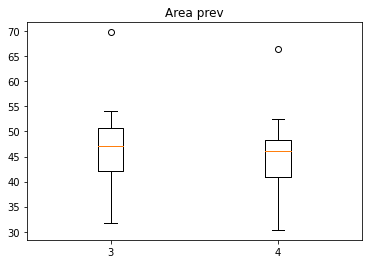

In [13]:
c1 = scale_table[scale_table['Class 4']==1]
c2 = scale_table[scale_table['Class 4']==2]
c3 = scale_table[scale_table['Class 4']==3]
c4 = scale_table[scale_table['Class 4']==4]


kruskalwallis = mstats.kruskalwallis(list(c3['Area'].dropna()), list(c4['Area'].dropna()))
print(f"AREA prev,{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
#print(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
#plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
plt.boxplot([c3['Area'].dropna(), c4['Area'].dropna()], labels=['3', '4'])
plt.title("Area prev")
plt.show()

# Monthly

In [5]:
min_temp = pd.read_excel('../../input/MinClimate_MODIFIED.xlsx', sheet_name='TEMP_MOD')
min_prec = pd.read_excel('../../input/MinClimate_MODIFIED.xlsx', sheet_name='PREC_MOD')
a_classified = pd.read_excel('../../input/quotient_deviation_df_A_CLASSIFIED.xlsx')
b_classified = pd.read_excel('../../input/quotient_deviation_df_B_CLASSIFIED_FIXED.xlsx')

In [11]:
min_temp = min_temp[min_temp['Month']>4].reset_index(drop=True)
min_temp = min_temp[min_temp['Month']<10].reset_index(drop=True)
min_prec = min_prec[min_prec['Month']>4].reset_index(drop=True)
min_prec = min_prec[min_prec['Month']<10].reset_index(drop=True)

In [16]:
min_cumsum_prec = min_prec.cumsum()
min_cumsum_prec['Month'] = min_prec['Month']
min_cumsum_prec['Week'] = min_prec['Week']
min_cumsum_prec['Day'] = min_prec['Day']

In [26]:
prec_max = max(min_cumsum_prec.max(skipna=True))
prec_min = min(min_cumsum_prec.min(skipna=True))

In [28]:
(min_cumsum_prec - prec_min) / (prec_max - prec_min)

,Month,Week,Day,1915,1916,1917,1918,1919,1920,1921,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0.011539,0.041542,0.002308,0.000000,0.000000,0.005077,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.007385,0.001385,0.018694,0.005077,0.000000,0.000000,NaN
1,0.011539,0.041542,0.004616,0.001846,0.003462,0.005077,0.000000,0.032310,0.000000,0.000000,...,0.000000,0.000692,0.001616,0.008308,0.001385,0.018694,0.005077,0.000000,0.000000,NaN
2,0.011539,0.041542,0.006924,0.001846,0.003462,0.005077,0.000000,0.032310,0.000000,0.005308,...,0.000000,0.000692,0.001616,0.008308,0.001385,0.018694,0.006231,0.002077,0.000000,NaN
3,0.011539,0.041542,0.009231,0.001846,0.003462,0.005077,0.002539,0.032310,0.000000,0.005308,...,0.000000,0.024925,0.001616,0.008308,0.009001,0.025387,0.006231,0.002077,0.013847,NaN
4,0.011539,0.041542,0.011539,0.006924,0.003462,0.008308,0.004847,0.032310,0.016617,0.006462,...,0.000000,0.024925,0.001616,0.012232,0.009693,0.025387,0.006231,0.002077,0.013847,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.020771,0.090007,0.060005,0.356335,0.414032,0.426264,0.483037,0.550889,0.467805,0.345257,...,0.564967,0.506116,0.644126,0.466882,0.517194,0.537503,0.518348,0.654743,NaN,NaN
149,0.020771,0.090007,0.062312,0.361182,0.414032,0.426264,0.483037,0.550889,0.471498,0.345257,...,0.565890,0.506116,0.644126,0.466882,0.521348,0.537503,0.518348,0.654743,NaN,NaN
150,0.020771,0.090007,0.064620,0.361182,0.414032,0.426264,0.483037,0.550889,0.471498,0.345257,...,0.567044,0.506116,0.644126,0.466882,0.526194,0.537503,0.518348,0.654743,NaN,NaN
151,0.020771,0.090007,0.066928,0.361182,0.414032,0.426264,0.494115,0.561505,0.472421,0.345257,...,0.567044,0.507501,0.644126,0.481422,0.527117,0.537503,0.519271,0.654743,NaN,NaN


# Weekly

,Month,Week,Day,1915,1916,1917,1918,1919,1920,1921,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1,1,1,NaN,-24.0,-47.3,-6.1,-30.1,-22.6,-37.6,...,-17.0,-23.0,-22.2,-8.2,-24.2,-1.0,-7.7,-13.5,-3.9,NaN
1,1,1,2,NaN,-24.7,-44.5,-14.5,-31.7,-26.5,-36.9,...,-21.3,-24.7,-34.2,-18.2,-30.0,-2.3,-11.7,-24.6,-1.9,NaN
2,1,1,3,NaN,-21.4,-43.5,-15.9,-26.3,-23.2,-37.0,...,-24.7,-31.2,-27.9,-20.6,-30.0,-4.1,-8.4,-24.8,-2.4,NaN
3,1,1,4,NaN,-26.1,-43.5,-14.2,-15.3,-16.4,-37.9,...,-27.1,-33.2,-34.0,-22.7,-28.7,-7.9,-13.1,-26.5,-0.3,NaN
4,1,1,5,NaN,-22.0,-42.7,-22.6,-6.9,-26.9,-36.0,...,-23.7,-34.6,-36.3,-26.5,-30.2,-14.6,-8.6,-24.8,0.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,12,52,27,-16.2,-29.9,-40.4,-26.9,-25.8,NaN,-7.1,...,-5.3,-27.6,-22.8,-19.5,-18.2,-9.3,-1.0,-18.8,NaN,NaN
362,12,52,28,-23.0,-36.8,-32.9,-14.0,-14.5,NaN,-6.0,...,-12.1,-17.6,-16.1,-25.4,-2.2,-4.5,-3.9,-18.4,NaN,NaN
363,12,52,29,-18.3,-42.1,-31.7,-15.4,-12.0,NaN,-9.4,...,-26.0,-27.0,-17.6,-9.6,-2.3,-9.5,-2.6,-16.1,NaN,NaN
364,12,53,30,-15.1,-41.8,-26.5,-19.0,-10.6,NaN,-10.6,...,-18.3,-30.9,-20.5,-5.3,-1.8,-21.1,-2.7,-7.2,NaN,NaN
